# Trabajo Practico 2 - Analisis y Curación de datos

## Ulises Dascalakis

Mail : ulises.dasca@live.com.ar

## Alejandro Bernal

Mail : alejandro@alejandro.bio

# Librerias

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Realicen en esta celda los imports de librerías que necesiten

#Importamos Seaborn para dibujar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Importando data set

In [10]:
# Importamos el dataset. Ayornen el path del archivo al que ustedes tengan. Así como el nombre del dataset.
# Como el dataset fue creado usando como delimitador un tab, si no lo definimos a la hora de importarlo, se va romper.
df = pd.read_csv('data/reviews_yelp_nn.csv', sep='\t')

# Análisis de Datos

In [14]:
# Determinando las features/caracteristicas
list(df.columns.values)

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

### Descripción de las features

<table>
    <tr>
        <th>Feature</th>
        <th>Tipo de dato</th>
        <th>Significado</th>
    </tr>
    <tr>
        <td>review_id</td>
        <td>string</td>
        <td>id de la review</td>
    </tr>
    <tr>
        <td>user_id</td>
        <td>string</td>
        <td>id para poder cruzar con otros dataset</td>
    </tr>
    <tr>
        <td>business_id</td>
        <td>string</td>
        <td>id para poder cruzar con otros dataset.</td>
    </tr>
    <tr>
        <td>stars</td>
        <td>int</td>
        <td>el rating recibido</td>
    </tr>
    <tr>
        <td>date</td>
        <td>fecha</td>
        <td>fecha de la review</td>
    </tr>
    <tr>
        <td>text</td>
        <td>string</td>
        <td>la review misma del negocio</td>
    </tr>
    <tr>
        <td>useful</td>
        <td>float</td>
        <td>que tan "útil" fue la review</td>
    </tr>
    <tr>
        <td>funny</td>
        <td>float</td>
        <td>que tan "divertida" fue la review</td>
    </tr>
    <tr>
        <td>cool</td>
        <td>int</td>
        <td>que tan "cool" fue la review</td>
    </tr>
</table>

In [19]:
### Describiendo los datos de la columna "review id"
df['review_id'].describe()

### El tipo de campo es : String
### Todos los valores son únicos y no se repiten lo cual es esperable
### Hay 3.342.949 registros 

count                    3342949
unique                   3342949
top       6fAxaSvpUb37BijdgVRNSg
freq                           1
Name: review_id, dtype: object

In [22]:
### Describiendo los datos de la columna "user id"
df['user_id'].describe()

### El tipo de campo es : String
### Hay 3.342.944 registros, lo cual es curioso porque hay 5 registros menos que los ids de review
### hay 1.114.848 registros únicos, lo cual es esperable dado que pueden haber más de un registro por usuario

count                    3342944
unique                   1114848
top       CxDOIDnH8gp9KXzpBHJYXw
freq                        2118
Name: user_id, dtype: object

In [23]:
### Describiendo los datos de la columna "business id"
df['business_id'].describe()

### El tipo de campo es : String
### Hay 3.342.958 registros, lo cual es curioso porque hay 9 registros más que los ids de review
### hay   186.747 registros únicos, lo cual es esperable puesto que pueden haber varias revisiones para un mismo negocio

count                    3342958
unique                    186747
top       4JNXUYY8wbaaDmk3BPzlWw
freq                        4311
Name: business_id, dtype: object

In [45]:
### Describiendo los datos de la columna "stars"
df['stars'].describe()

### El tipo de campo es : Float
### Hay 3.342.949 registros, que son la misma cantidad que ids de reviews
### Al ser un campo de punto flotante, los campos estan expresado con una nomenclatura exponencial e+06 ...

count    3.342949e+06
mean     3.716367e+00
std      1.463816e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [46]:
### Describiendo los datos de la columna "date"
df['date'].describe()

### El tipo de campo es : Fecha
### Hay 3.342.953 registros, lo cual es curioso porque hay 4 registros mas que los ids de reviews
### Hay 3.309.298 registros unicos, lo cual es esperable porque en una misma fecha, hora, minuto y segundo pudieron haber varias reviews

count                 3342953
unique                3309298
top       2012-07-09 08:22:43
freq                        5
Name: date, dtype: object

In [32]:
### Describiendo los datos de la columna "date"
df['text'].describe()

### El tipo de campo es : String
### Hay 3.342.948 registros, lo cual es curioso porque hay 1 registro menos que los ids de reviews
### Hay 3.338.493 registros unicos, lo cual es esperable porque pudieron haber comentarios iguales para diferentes reviews

count     3342948
unique    3338493
top             .
freq           12
Name: text, dtype: object

In [39]:
### Describiendo los datos de la columna "date"
df['useful'].describe()

### El tipo de campo es : Float
### Hay 3.342.944 registros, lo cual es curioso porque hay 5 registros menos que los ids de reviews
### El valor maximo es de 1.122 y el mínimo de -1, lo cual es raro porque parecen ser outlayers, porque el promedio es de 1.3

count    3.342944e+06
mean     1.352042e+00
std      3.645569e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.122000e+03
Name: useful, dtype: float64

In [49]:
### Describiendo los datos de la columna "funny"
df['funny'].describe()

### El tipo de campo es : Float
### Hay 3.342.949 registros
### El rango de los datos es de 0.0 a 9.7
### El promedio de los datos es de 4.8

count    3.342949e+06
mean     4.814486e-01
std      2.341234e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.700000e+02
Name: funny, dtype: float64

In [56]:
### Describiendo los datos de la columna "cool"
df['cool'].describe()

### El tipo de campo es : Int
### Hay 3.342.955 registros
### Hay       248 registros unicos, lo cual es esperable porque pueden haber varias calificaciones iguales para las diferentes reviews
### El rango de los datos es de 0 a 5

count     3342955
unique        248
top             0
freq      2409116
Name: cool, dtype: int64

In [9]:
#Usamos la función info de pandas para obtener info del dataframe
df.info()

#También podemos utilizar dtypes, pero esta función muestra solo los tipos de datos
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(6)
memory usage: 229.5+ MB


In [7]:
#1) EVALUAMOS SI HAY REGISTROS NaN
df.isnull().any()
##VEMOS QUE HAY REGISTROS NULL PARA TODOS LOS CAMPOS MENOS PARA business_id

business_id    False
cool            True
date            True
funny           True
review_id       True
stars           True
text            True
useful          True
user_id         True
dtype: bool

In [21]:
##ANALIZAMOS SI TENEMOS REGISTROS REPETIDOS
##EVALUAMOS SOBRE REVIEW_ID PORQUE CONSIDERAMOS QUE DEBERÍAN SER VALORES ÚNICOS YA QUE ESTAMOS ANALIZANDO REVIEWS 
#Y NO DEBERÍA HABER DOS REVIEW CON EL MISMO ID
df_nunique = df.groupby('review_id')['review_id'].nunique()
registros_unicos = df_nunique.shape[0]
registros_totales = df.shape[0]
registros_repetidos = registros_totales - registros_unicos
print("Tenemos " + str(registros_repetidos) + " registros repetidos de un total de " + str(registros_totales))

Tenemos 9 registros repetidos de un total de 3342958


In [19]:
#COMO TAMBIÉN TENEMOS VALORES NULOS, DIMENSIONAMOS LOS DATOS QUE PERDEMOS PARA EL ANÁLISIS
registros_con_valores_nulos = len(df.isnull().values[df.isnull().values == True])
registros_totales = len(df.values)
participacion_nulos = ((registros_con_valores_nulos / registros_totales) * 100)
print('Encontramos ' + str(registros_con_valores_nulos) 
      + ' registros con valores nulos de un total de ' + str(registros_totales) + ' registros totales'
     + ' con una participación del ' + str(round(participacion_nulos, 4)) + '%')

Tenemos 73 registros con valores nulos de un total de 3342958 registros totales con una participación del 0.0022%


In [26]:
#ELIMINAMOS LOS REGISTROS CON NULOS 
df_with_values = df.dropna()
registros_totales = df_with_values.shape[0]
print("Luego de eliminar los registros nulos, nos quedan " + str(registros_totales) + ' para el análisis')

Luego de eliminar los registros nulos, nos quedan 3342943 para el análisis


In [25]:
#EVALUAREMOS SI AÚN QUEDAN REGISTROS REPETIDOS
df_nunique = df_with_values.groupby('review_id')['review_id'].nunique()
registros_unicos = df_nunique.shape[0]
registros_totales = df_with_values.shape[0]
registros_repetidos = registros_totales - registros_unicos
print("Luego de eliminar los valores nulos, tenemos " 
      + str(registros_repetidos) + " registros repetidos de un total de " + str(registros_totales))

Luego de eliminar los valores nulos, tenemos 0 registros repetidos de un total de 3342943


In [8]:
#3) CORROBORAMOS QUE NO QUEDEN VALORES NaN
df_with_values.isnull().any()

business_id    False
cool           False
date           False
funny          False
review_id      False
stars          False
text           False
useful         False
user_id        False
dtype: bool

In [10]:
#EN CONCLUSIÓN, EL 0,002% DEL DATASET FUERON DESCARTADOS POR CONTENER VALORES NULOS

In [27]:
#ANALIZAMOS NUEVAMENTE LOS TIPOS DE DATOS SOBRE EL DATASET LIMPIO
df_with_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342943 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(6)
memory usage: 255.0+ MB


In [12]:
#5) PODEMOS COMENZAR A FORZAR LOS TIPOS DE DATOS
#CONVERTIMOS LOS TIPOS DE DATOS A INT
df_with_values = df_with_values.astype({'cool': 'int32', 'funny': 'int32', 'stars': 'int32', 'useful': 'int32'})

#INTENTAMOS CONVERTIR LOS TIPOS DE DATOS OBJECT A STRING PERO VEMOS EN 
#https://pbpython.com/pandas_dtypes.html QUE LOS TIPOS DE DATOS SON EQUIVALENTE

In [13]:
df_with_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342943 entries, 0 to 3342957
Data columns (total 9 columns):
business_id    object
cool           int32
date           object
funny          int32
review_id      object
stars          int32
text           object
useful         int32
user_id        object
dtypes: int32(4), object(5)
memory usage: 204.0+ MB


In [14]:
#Corroboramos nuevamente si existen valores nulos
df_with_values.isnull().any()

business_id    False
cool           False
date           False
funny          False
review_id      False
stars          False
text           False
useful         False
user_id        False
dtype: bool

In [15]:
##ANALIZAMOS SI TENEMOS REGISTROS REPETIDOS
##EVALUAMOS SOBRE REVIEW_ID PORQUE CONSIDERAMOS QUE DEBERÍAN SER VALORES ÚNICOS YA QUE ESTAMOS ANALIZANDO REVIEWS 
#Y NO DEBERÍA HABER MÁS DE UNA REVIEW CON EL MISMO ID
df_nunique = df_with_values.groupby('review_id')['review_id'].nunique()
df_nunique.shape[0] == df_with_values.shape[0]

True

C:\Users\Ulises\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


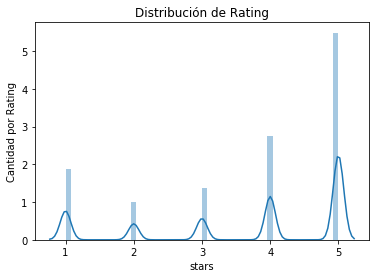

In [16]:
plt.title('Distribución de Rating')
plt.ylabel('Cantidad por Rating')
sns.distplot(df_with_values['stars'])

In [17]:
##Exploramos correlaciones
##ESTO DEMORA DEMASIADO
#sns.pairplot(data=df_with_values[["funny", "cool", "useful", "stars"]])